<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Фильтрация-по-площади,-цены,-числа-комнат,-высоты-потолков-квартир" data-toc-modified-id="Фильтрация-по-площади,-цены,-числа-комнат,-высоты-потолков-квартир-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Фильтрация по площади, цены, числа комнат, высоты потолков квартир</a></span></li><li><span><a href="#Изучение-времени-продажи-квартир" data-toc-modified-id="Изучение-времени-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартир</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры</a></span></li><li><span><a href="#10-населенных-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="10-населенных-пунктов-с-наибольшим-числом-объявлений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>10 населенных пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Исследование-квартир-Санкт-Петербурга" data-toc-modified-id="Исследование-квартир-Санкт-Петербурга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Исследование квартир Санкт-Петербурга</a></span></li><li><span><a href="#Изучение-квартир,-находящихся-в-центре" data-toc-modified-id="Изучение-квартир,-находящихся-в-центре-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучение квартир, находящихся в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df.duplicated().sum()

0

### Вывод

В таблице имеются пропуски, нужно подумать как с ними работать.

В данных есть аномально низкие и аномально выскоие значения показателей.

Дубликатов нет.

- first_day_exposition - изменить тип данных на date
- floors_total - изменить тип данных на int
- is_apartment - изменить тип данных на bool
- balcony - int
- parks_around3000 - int
- parks_nearest           int
- ponds_around3000    int
- ponds_nearest   int        int
- days_exposition - int 

Возможные причины пропусков:
- не указано количество балконов, видимо их просто нет
- высота потолков, люди проживающие в квартирах, где потолки стандартные не считают важным заполнять эту графу
- жилая площадь и площадь кухни, указав общую площадь, а возможно и схему квартиры, продавцы квартир не указывали жилую площадь и площадь кухни
- пропуски в апартаментах могут означать, что это квартиры, продавая апартаменты наверняка укажешь, что это именно они
- пропуски, связанные с количеством дней от публикации до снятия могут быть связаны с тем, что квартира уже продана, но не снято объявление, либо квартира еще продается
- расстояние до аэропорта, количество прудов, парков - возможно связано с тем, что продавцы не считали это важной информацией, так как указав адрес, можно посмотреть, что окружает дом, в которой квартира. А также возможно на сайте нет API с геолокацией, которое автоматически считало бы это количество.

## Предобработка данных

In [7]:
#пойдем по порядку
#значения количества картинок, цены выглядят адекватными, рассмотрим количество комнат
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [8]:
#можно удалить квартиры, в которых комнат больше 7, будет меньше выбросов. Это меньше 0,15 процента от всего датасета
df = df[df['rooms'] < 8]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23668 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23668 non-null int64
last_price              23668 non-null float64
total_area              23668 non-null float64
first_day_exposition    23668 non-null object
rooms                   23668 non-null int64
ceiling_height          14482 non-null float64
floors_total            23582 non-null float64
living_area             21766 non-null float64
floor                   23668 non-null int64
is_apartment            2774 non-null object
studio                  23668 non-null bool
open_plan               23668 non-null bool
kitchen_area            21394 non-null float64
balcony                 12169 non-null float64
locality_name           23619 non-null object
airports_nearest        18126 non-null float64
cityCenters_nearest     18149 non-null float64
parks_around3000        18150 non-null float64
parks_nearest           8053 non-null float64
ponds_around300

In [9]:
#потолки, тут есть аномально большие значения и пропущенные
#заменим пока пропущенные значения на ноль
df['ceiling_height'].value_counts().sort_index()

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 182, dtype: int64

In [10]:
#посмотрим сколько у нас потолков больше 4 метров
df['ceiling_height'][df['ceiling_height'] > 4].count()

75

In [11]:
#заполним пропуски, как среднее значение, не учитывая квартиры, которые имеют потолок выше 4 метров
#обычно у домов типовая застройка, сгруппируем по количеству этажей
height = df.groupby('floors_total')['ceiling_height'].mean()
df['ceiling_height'] = df['ceiling_height'].fillna(height)

In [12]:
#df['ceiling_height'].value_counts().sort_index()

In [13]:
#всего 75 квартир, удалим такие квартиры
#df = df[df['ceiling_height'] <= 4]

In [14]:
#удалим пропуски в столбце с количеством этажей и населенным пунктом, там их относительно малое количество
df = df.dropna(subset=['floors_total','locality_name'])

Пропуски с жилой площадью и площадью кухни пока оставим пустыми.

In [15]:
#Для людей, которые продают апартаменты очень важно ставить в известность потенциальных покупателей об этом, другим же нет.
#Поэтому заменим все пропущенные значения на False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [16]:
#если не указано количество балконов, то вероятнее всего их нет
df['balcony'] = df['balcony'].fillna(0)

In [17]:
#заметим, что кто-то пишем посЕлок, а кто-то посЁлок
df['locality_name'].value_counts()

Санкт-Петербург       15621
посёлок Мурино          520
посёлок Шушары          439
Всеволожск              398
Пушкин                  369
                      ...  
посёлок Белоостров        1
деревня Хязельки          1
поселок Семиозерье        1
поселок Перово            1
деревня Пельгора          1
Name: locality_name, Length: 364, dtype: int64

In [18]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
df = df.dropna(subset=['locality_name'])

In [19]:
df.pivot_table(index = 'locality_name', values = 'airports_nearest')

,airports_nearest
locality_name,
Зеленогорск,73300.250000
Колпино,26370.000000
Красное Село,26610.028736
Кронштадт,67469.263158
Ломоносов,48308.280303
Павловск,21053.342105
Петергоф,40184.676617
Пушкин,16447.869919
Санкт-Петербург,28049.675356


In [20]:
#населенных пунктов много, до которых неизвестно расстояние до аэропорта
len(df['locality_name'][df['airports_nearest'].isna()].unique())

311

In [21]:
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.108702,0.122006,0.106127,-0.001428,0.009664,0.110878,0.032804,0.010398,-0.028237,-0.024698,0.107217,0.046800,-0.003148,-0.048665,0.021255,-0.006775,-0.011608,-0.004325,-0.027366
last_price,0.108702,1.000000,0.642267,0.350982,0.089521,-0.007575,0.552335,0.023049,0.028513,-0.025812,-0.008909,0.506240,0.012105,-0.026195,-0.211037,0.154477,-0.016088,0.163287,-0.086907,0.081984
total_area,0.122006,0.642267,1.000000,0.748464,0.096204,-0.073840,0.936858,-0.025720,0.031481,-0.074396,-0.035963,0.597197,0.015382,-0.028017,-0.233425,0.164523,-0.022832,0.166529,-0.100823,0.150706
rooms,0.106127,0.350982,0.748464,1.000000,0.052472,-0.230568,0.839023,-0.154960,0.000882,-0.151474,-0.090922,0.251467,-0.011535,-0.058739,-0.182028,0.133738,-0.056625,0.094456,-0.056893,0.123962
ceiling_height,-0.001428,0.089521,0.096204,0.052472,1.000000,-0.028124,0.090449,-0.010881,0.154505,0.001671,0.042652,0.087333,0.032400,-0.021942,-0.090187,0.065387,-0.019207,0.077099,-0.058962,0.018412
floors_total,0.009664,-0.007575,-0.073840,-0.230568,-0.028124,1.000000,-0.170644,0.677864,-0.026461,0.070188,0.050822,0.168820,0.173094,0.107948,0.017579,-0.251367,0.097833,-0.122751,0.039484,-0.051535
living_area,0.110878,0.552335,0.936858,0.839023,0.090449,-0.170644,1.000000,-0.100169,0.028698,-0.058026,-0.034730,0.406994,-0.010205,-0.055667,-0.231298,0.182866,-0.052970,0.152561,-0.081742,0.141111
floor,0.032804,0.023049,-0.025720,-0.154960,-0.010881,0.677864,-0.100169,1.000000,-0.013261,0.035935,0.036183,0.137589,0.171419,0.072778,0.007824,-0.162931,0.073691,-0.076351,0.026115,-0.038673
is_apartment,0.010398,0.028513,0.031481,0.000882,0.154505,-0.026461,0.028698,-0.013261,1.000000,-0.003646,-0.002466,0.050261,0.032923,0.016480,0.003664,0.020956,-0.033614,0.024155,0.003255,0.015416
studio,-0.028237,-0.025812,-0.074396,-0.151474,0.001671,0.070188,-0.058026,0.035935,-0.003646,1.000000,-0.004222,NaN,0.029976,-0.021769,-0.006979,-0.030795,0.006922,0.000852,0.001774,-0.021530


In [23]:
#заполним пропуски жилой площади и кухни. хорошая корреляция с общей площадью и количеством комнат
df['living_area'] = df.groupby(['total_area','rooms'])['living_area'].transform(lambda x: x.fillna(x.mean()))

In [24]:
#посмотрим на корреляцию после заполнения пропусков в жилой плоащди
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.108702,0.122006,0.106127,-0.001428,0.009664,0.111015,0.032804,0.010398,-0.028237,-0.024698,0.107217,0.046800,-0.003148,-0.048665,0.021255,-0.006775,-0.011608,-0.004325,-0.027366
last_price,0.108702,1.000000,0.642267,0.350982,0.089521,-0.007575,0.553927,0.023049,0.028513,-0.025812,-0.008909,0.506240,0.012105,-0.026195,-0.211037,0.154477,-0.016088,0.163287,-0.086907,0.081984
total_area,0.122006,0.642267,1.000000,0.748464,0.096204,-0.073840,0.937851,-0.025720,0.031481,-0.074396,-0.035963,0.597197,0.015382,-0.028017,-0.233425,0.164523,-0.022832,0.166529,-0.100823,0.150706
rooms,0.106127,0.350982,0.748464,1.000000,0.052472,-0.230568,0.840104,-0.154960,0.000882,-0.151474,-0.090922,0.251467,-0.011535,-0.058739,-0.182028,0.133738,-0.056625,0.094456,-0.056893,0.123962
ceiling_height,-0.001428,0.089521,0.096204,0.052472,1.000000,-0.028124,0.091873,-0.010881,0.154505,0.001671,0.042652,0.087333,0.032400,-0.021942,-0.090187,0.065387,-0.019207,0.077099,-0.058962,0.018412
floors_total,0.009664,-0.007575,-0.073840,-0.230568,-0.028124,1.000000,-0.166143,0.677864,-0.026461,0.070188,0.050822,0.168820,0.173094,0.107948,0.017579,-0.251367,0.097833,-0.122751,0.039484,-0.051535
living_area,0.111015,0.553927,0.937851,0.840104,0.091873,-0.166143,1.000000,-0.097798,0.030966,-0.057644,-0.031834,0.405980,-0.005469,-0.053239,-0.227953,0.178907,-0.050668,0.150117,-0.080423,0.143541
floor,0.032804,0.023049,-0.025720,-0.154960,-0.010881,0.677864,-0.097798,1.000000,-0.013261,0.035935,0.036183,0.137589,0.171419,0.072778,0.007824,-0.162931,0.073691,-0.076351,0.026115,-0.038673
is_apartment,0.010398,0.028513,0.031481,0.000882,0.154505,-0.026461,0.030966,-0.013261,1.000000,-0.003646,-0.002466,0.050261,0.032923,0.016480,0.003664,0.020956,-0.033614,0.024155,0.003255,0.015416
studio,-0.028237,-0.025812,-0.074396,-0.151474,0.001671,0.070188,-0.057644,0.035935,-0.003646,1.000000,-0.004222,NaN,0.029976,-0.021769,-0.006979,-0.030795,0.006922,0.000852,0.001774,-0.021530


In [25]:
#корреляция лучше всего с общей площадью
df['kitchen_area'] = df.groupby('total_area')['kitchen_area'].transform(lambda x: x.fillna(x.mean()))

## Расчёты и добавление результатов в таблицу

In [26]:
#цена квадратного метра
df['price_sqr_meter'] = df['last_price']/df['total_area']

In [27]:
# день недели, месяц и год публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday_name
df['month'] = df['first_day_exposition'].dt.month_name()
df['year'] = df['first_day_exposition'].dt.year

In [28]:
#этаж квартиры
def floor(str):
    if str['floor'] == 1:
        return 'первый'
    elif str['floor'] == str['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [29]:
df['floor_type'] = df.apply(floor, axis = 1)

In [30]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей
df['ratio_total_and_living_area'] = df['living_area'] / df['total_area']
df['ratio_total_and_kitchen_area'] = df['kitchen_area'] / df['total_area']

In [31]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kithcen_area,price_sqr_meter,weekday,month,year,floor_type,ratio_total_and_living_area,ratio_total_and_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,25.0,120370.370370,Thursday,March,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.740000,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,11.0,82920.792079,Tuesday,December,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,3.009202,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,8.3,92785.714286,Thursday,August,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.969474,14,54.0,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,16.1,408176.100629,Friday,July,2015,другой,0.339623,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,41.0,100000.000000,Tuesday,June,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

### Фильтрация по площади, цены, числа комнат, высоты потолков квартир

In [32]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kithcen_area,price_sqr_meter,year,ratio_total_and_living_area,ratio_total_and_kitchen_area
count,23534.000000,2.353400e+04,23534.000000,23534.000000,14478.000000,23534.000000,23337.000000,23534.000000,21316.000000,23534.000000,18010.000000,18033.000000,18034.000000,8004.000000,18034.000000,9019.000000,20370.000000,23348.000000,2.353400e+04,23534.000000,23337.000000,21316.000000
mean,9.879706,6.480503e+06,60.000393,2.060211,2.771462,10.682162,34.135729,5.880088,10.537394,0.594289,28806.472238,14205.668330,0.610125,490.655672,0.768992,518.533097,180.504222,10.482462,9.934261e+04,2017.371463,0.564729,0.187468
std,5.681329,1.042803e+07,34.189255,1.035340,1.265914,6.595502,20.860288,4.871892,5.801655,0.961067,12638.000977,8611.279381,0.801062,341.612658,0.938278,278.036895,219.402615,5.678936,5.014530e+04,1.037082,0.103899,0.072925
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.300000,1.118349e+02,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18557.000000,9260.000000,0.000000,288.000000,0.000000,293.000000,45.000000,7.000000,7.656914e+04,2017.000000,0.495238,0.133333
50%,9.000000,4.625770e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26766.000000,13107.000000,0.000000,455.000000,1.000000,503.000000,95.000000,9.100000,9.500000e+04,2017.000000,0.568421,0.172414
75%,14.000000,6.750000e+06,69.500000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,1.000000,37284.000000,16293.000000,1.000000,612.000000,1.000000,731.000000,231.000000,11.850000,1.142061e+05,2018.000000,0.636735,0.232500
max,50.000000,7.630000e+08,631.200000,7.000000,100.000000,60.000000,347.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,107.000000,1.907500e+06,2019.000000,1.000000,0.787879


Text(0, 0.5, 'Количество квартир, шт.')

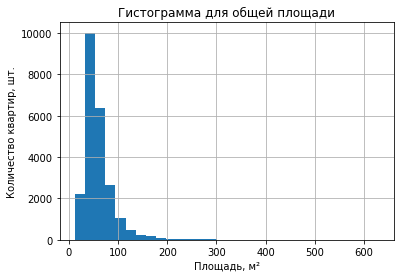

In [33]:
#гистограммы для площади, цены, числа комнат, высоты потолков
df['total_area'].plot(kind ='hist', bins = 30, title = 'Гистограмма для общей площади', grid = True)
plt.xlabel('Площадь, м²')
plt.ylabel('Количество квартир, шт.')

Text(0, 0.5, 'Площадь, м²')

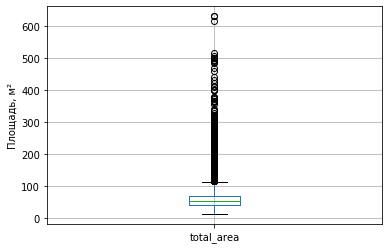

In [34]:
#заметно много выбросов, посмотрим сколько у нас квартир с большой квадратурой
df.boxplot(column = 'total_area')
plt.ylabel('Площадь, м²')

In [35]:
#квартир с площадью больше 200 кв. метров чуть больше тысячи
len(df.query('total_area > 200'))

199

Text(0, 0.5, 'Количество квартир, шт.')

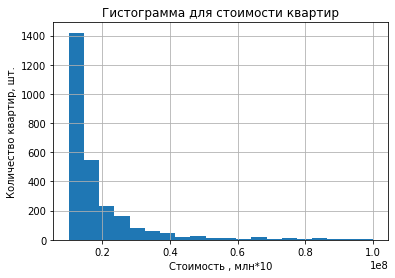

In [36]:
#замечаем, что большинство квартир стоит менее 5 млн
df['last_price'].hist(bins = 20, range = (10e6, 10e7))
plt.title('Гистограмма для стоимости квартир', size=12)
plt.xlabel('Стоимость , млн*10')
plt.ylabel('Количество квартир, шт.')

Text(0, 0.5, 'Количество квартир, шт.')

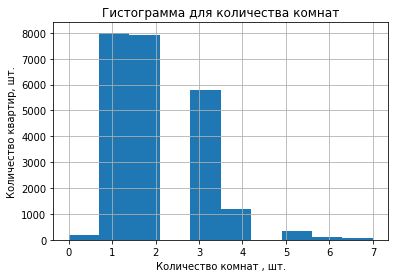

In [37]:
#ничего необычного, кроме того что есть квартиры, в которых 0 комнат(их не так много, так что можно от них избавиться)
df['rooms'].hist()
plt.title('Гистограмма для количества комнат', size=12)
plt.xlabel('Количество комнат , шт.')
plt.ylabel('Количество квартир, шт.')

Text(0, 0.5, 'Количество квартир, шт.')

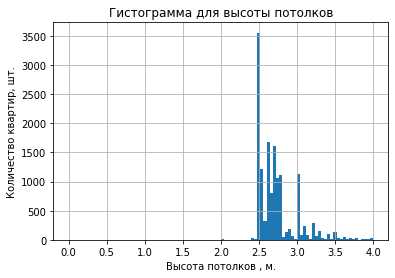

In [38]:
df['ceiling_height'].hist(bins=100, range =(0, 4))
plt.title('Гистограмма для высоты потолков', size=12)
plt.xlabel('Высота потолков , м.')
plt.ylabel('Количество квартир, шт.')

Text(0, 0.5, 'Высота потолков , м.')

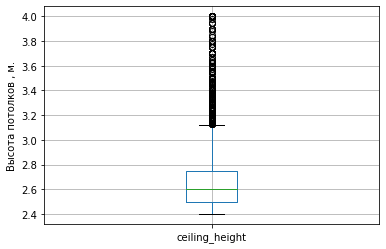

In [69]:
#здесь гораздо лучше, что также рассматривались квартиры для хоббитов(возможно это какие-либо нежилые помещения)
df.boxplot(column = 'ceiling_height')
plt.ylabel('Высота потолков , м.')

In [40]:
#подкорректируем наш датасет
df = df.query('total_area <= 200 and last_price <= 10000000 and 1<= rooms <= 6 and 2.4<=ceiling_height <= 4')

В результате рассмотрения гистрограмм и боксплотов было выявлены некоторые выбросы в данных. Исходный датасет отфильтрован, убраны квартиры:
- с площадью более 200 кв. м.
- ценой выше 10 млн.
- более 6 комнат
- высотой потолков ниже 2.4 м

### Изучение времени продажи квартир

Text(0, 0.5, 'Количество квартир, шт.')

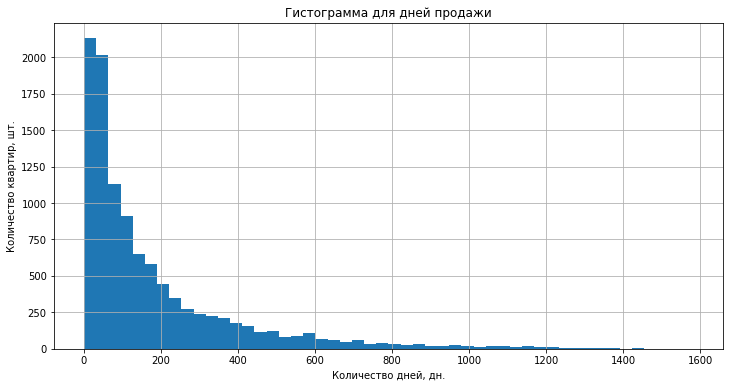

In [41]:
df['days_exposition'].hist(bins = 50,  figsize=(12,6))
plt.title('Гистограмма для дней продажи', size=12)
plt.xlabel('Количество дней, дн.')
plt.ylabel('Количество квартир, шт.')

In [42]:
df['days_exposition'].describe()

count    10599.000000
mean       178.875271
std        216.301344
min          1.000000
25%         43.000000
50%         96.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [43]:
#уберем значения более года
new_df = df.query('days_exposition <= 365')

In [44]:
new_df['days_exposition'].describe()

count    9060.000000
mean      105.202759
std        90.390732
min         1.000000
25%        35.000000
50%        74.000000
75%       156.000000
max       364.000000
Name: days_exposition, dtype: float64

Отфильтровав старые объявления квартир, которые возможно уже даже проданы, но висят на сайте, получается что среднее время продажи квартир составляет 105 дней, а медианное 90 дней.
- Быстрыми сделками можно считать, те которые завершились за 35 дней
- Долгими сделки проходят дольше 156 дней

### Какие факторы больше всего влияют на стоимость квартиры

In [45]:
flat_price = new_df.pivot_table(index='total_area', values='last_price', aggfunc=['mean', 'median'])

Text(0, 0.5, 'Количество квартир, шт.')

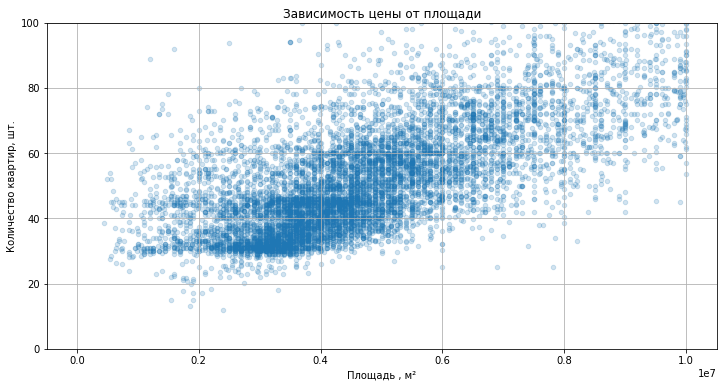

In [46]:
new_df.plot(title='Зависимость цены от площади', x='last_price', y='total_area', kind = 'scatter',  
            grid=True, alpha = 0.2, ylim= (0, 100), figsize = (12,6))
plt.xlabel('Площадь , м²')
plt.ylabel('Количество квартир, шт.')

Заметно постепенное повышение стоимости относительно повышения площади квартир.

In [47]:
rooms_price = new_df.pivot_table(index='rooms', values='last_price')

Text(0, 0.5, 'Количество квартир, шт.')

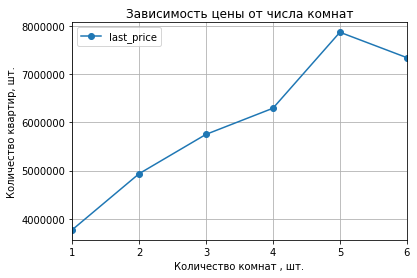

In [48]:
rooms_price.plot(title='Зависимость цены от числа комнат', style='o-', grid=True)
plt.xlabel('Количество комнат , шт.')
plt.ylabel('Количество квартир, шт.')

Цена больше всего повышается от однокомнатных квартир к двухкомнатным и от четырехкомнатных до пятикомнатных.

Text(0, 0.5, 'Расстояние до центра, м.')

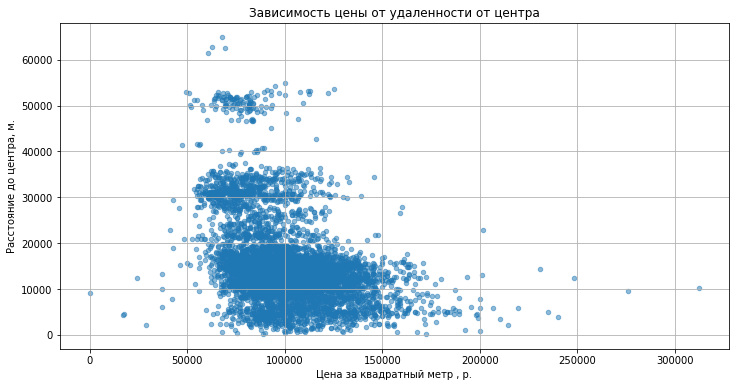

In [49]:
new_df.plot(title='Зависимость цены от удаленности от центра',
            x='price_sqr_meter', y='cityCenters_nearest', kind = 'scatter',  grid=True, alpha = 0.5, figsize = (12,6))
plt.xlabel('Цена за квадратный метр , р.')
plt.ylabel('Расстояние до центра, м.')

Видим некоторый прямоугольный треугольник, чем дальше от центра, тем стоимость квадратного метра ниже.

In [50]:
floors=new_df.pivot_table(index='floor_type', values='last_price', aggfunc='median')

Text(0, 0.5, 'Стоимость квартиры, р.')

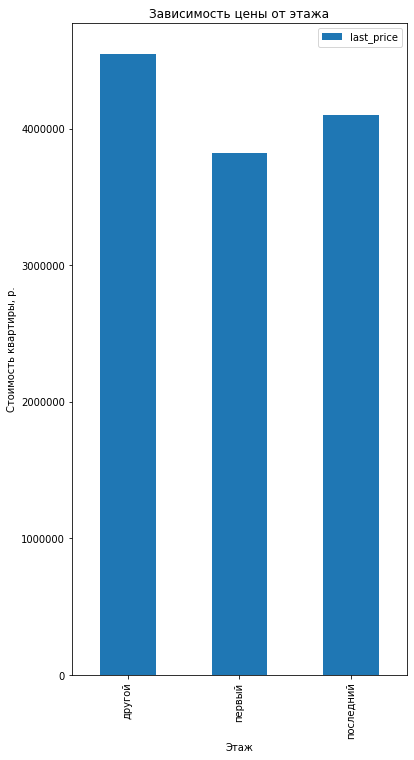

In [51]:
floors.plot(title = 'Зависимость цены от этажа',kind ='bar', figsize=(6,12))
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры, р.')

In [52]:
floors

,last_price
floor_type,
другой,4550000.0
первый,3820000.0
последний,4100000.0


Квартиры на первом этаже самые дешевые, далее идет последний этаж, но лучше всего с ценами, которые находятся между первым и последним.

Text(0, 0.5, 'Количество квартир, шт.')

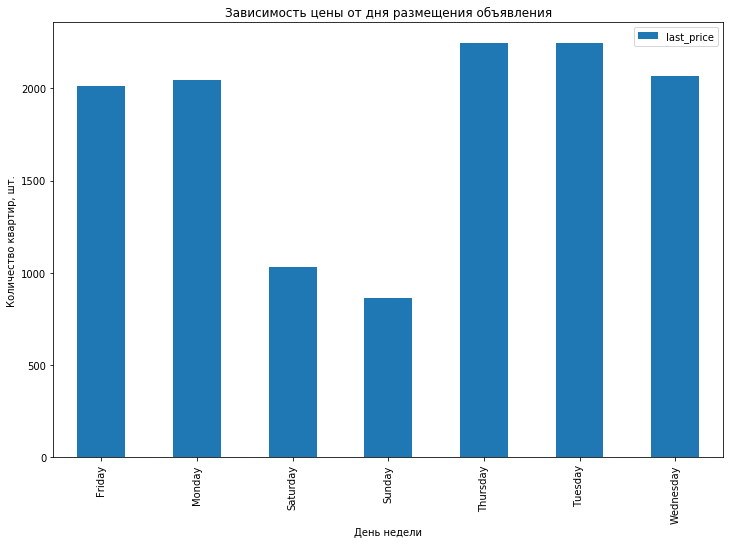

In [53]:
df_weekday = df.groupby(['weekday']).count() 

df_weekday.plot(y='last_price', title = 'Зависимость цены от дня размещения объявления',kind ='bar', figsize=(12,8))
plt.xlabel('День недели')
plt.ylabel('Количество квартир, шт.')

Чаще квартиры начинают продавать на буднях.

Text(0, 0.5, 'Количество квартир, шт.')

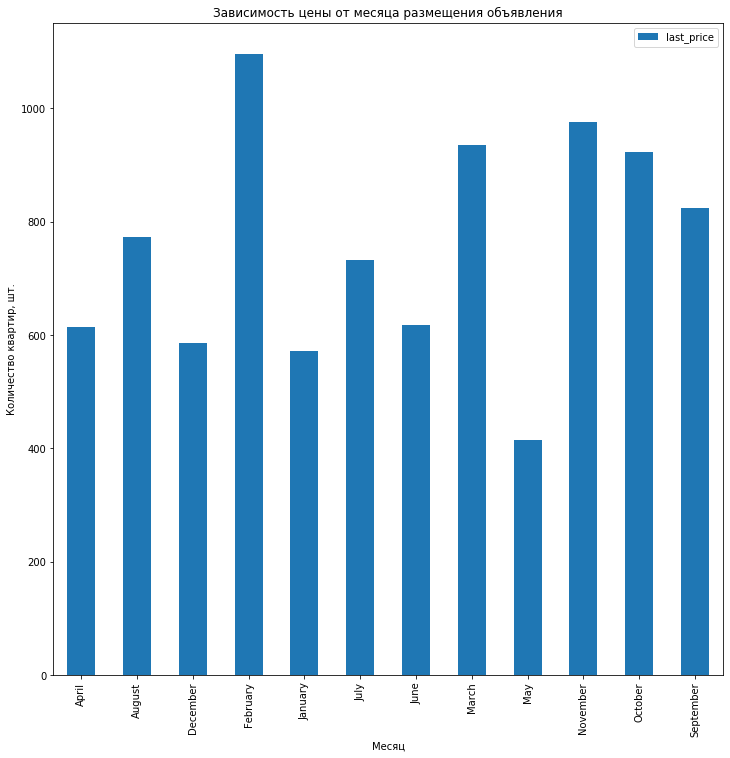

In [54]:
months = new_df.pivot_table(index='month', values='last_price', aggfunc='count')


months.plot(title = 'Зависимость цены от месяца размещения объявления',kind ='bar', figsize=(12,12))
plt.xlabel('Месяц')
plt.ylabel('Количество квартир, шт.')

Наибольшее количество объявлений было дано осенью, а также выделяется февраль.

Text(0, 0.5, 'Количество квартир, шт.')

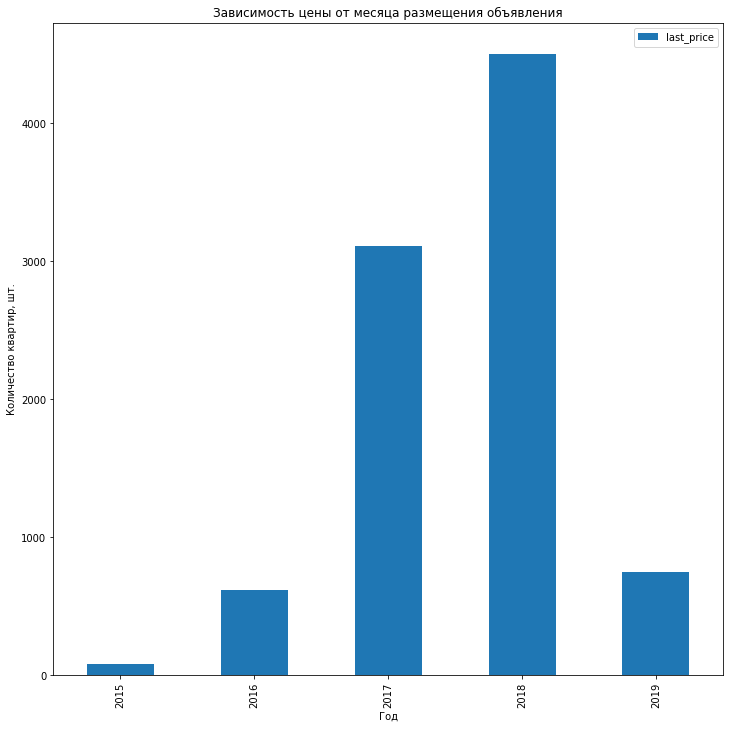

In [55]:
years = new_df.pivot_table(index='year', values='last_price', aggfunc='count')


years.plot( title = 'Зависимость цены от месяца размещения объявления',kind ='bar', figsize=(12,12))
plt.xlabel('Год')
plt.ylabel('Количество квартир, шт.')

В данных предоставлены объявления в основном 2017-2018 годов.

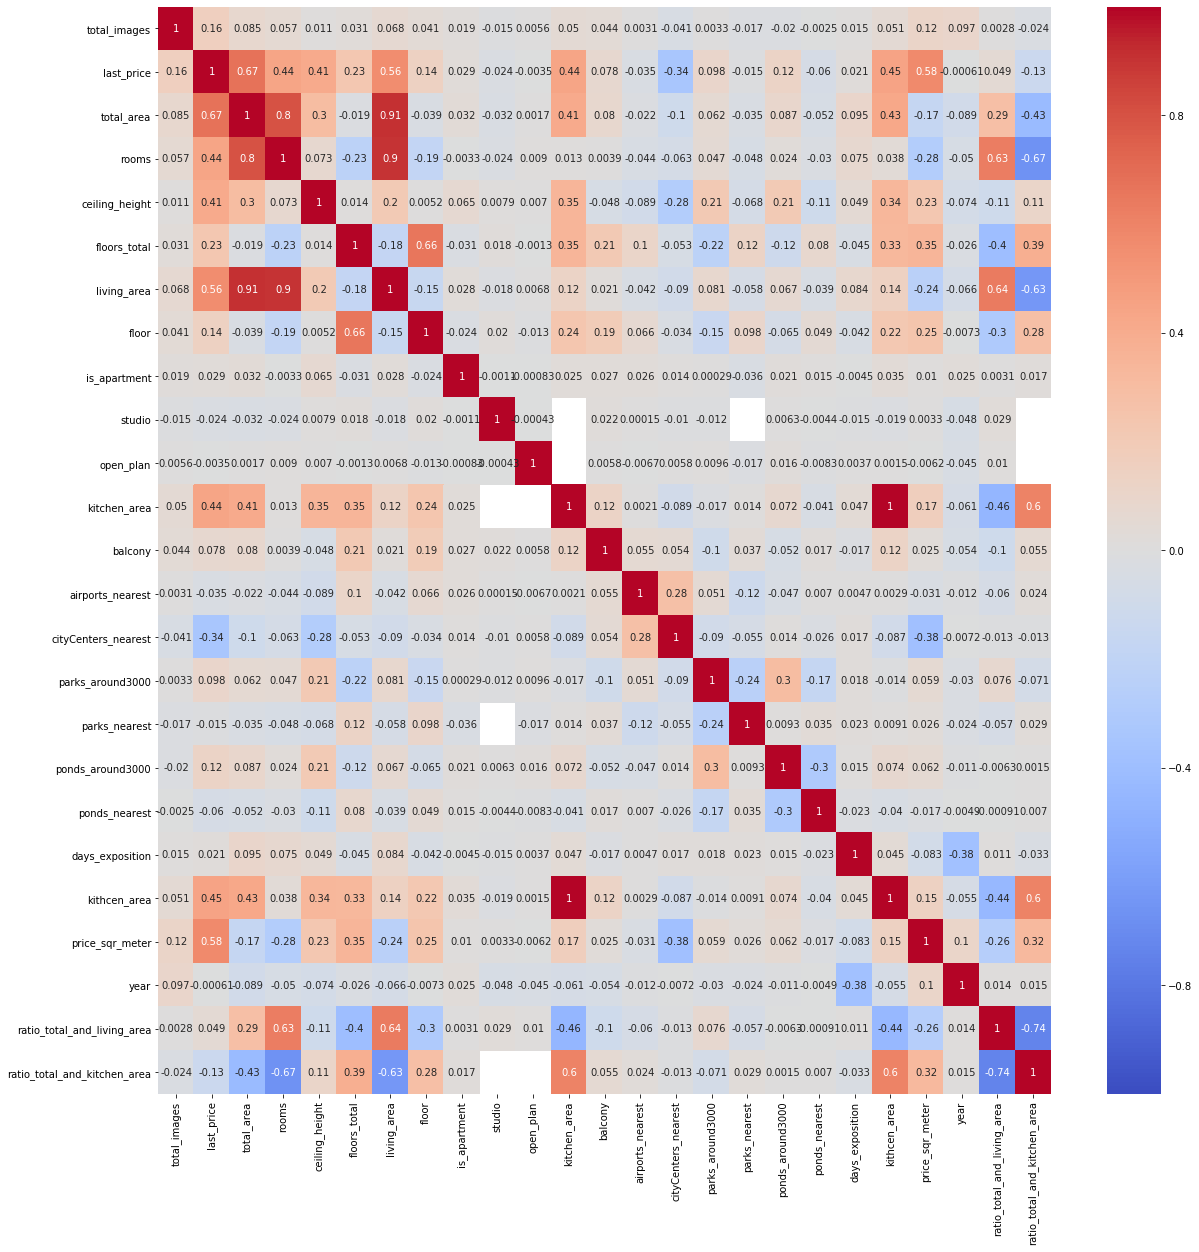

In [56]:
import seaborn as sns
from matplotlib.pyplot import figure

plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


Заметно, что цена зависит от общей, жилой и площади кухни, а также от высоты потолков и количества комнат

### 10 населенных пунктов с наибольшим числом объявлений

In [57]:
cities=(new_df.groupby('locality_name')['price_sqr_meter'].agg(['mean', 'count'])).sort_values(by='count', 
                                                                                         ascending=False).head(10)
cities

,mean,count
locality_name,,
Санкт-Петербург,103791.021334,6092
Всеволожск,66605.751014,182
поселок Мурино,87978.420136,181
поселок Шушары,78826.112241,166
Колпино,74368.214927,158
Пушкин,98476.874733,147
поселок Парголово,89565.337755,110
Гатчина,70249.559766,104
деревня Кудрово,90944.280143,102


In [58]:
cities.sort_values(by='mean', ascending = False)

,mean,count
locality_name,,
Санкт-Петербург,103791.021334,6092
Пушкин,98476.874733,147
деревня Кудрово,90944.280143,102
поселок Парголово,89565.337755,110
поселок Мурино,87978.420136,181
Петергоф,83445.763927,97
поселок Шушары,78826.112241,166
Колпино,74368.214927,158
Гатчина,70249.559766,104


Больше всего объявлений из самого Санкт-Петербурга, также стоимость квадратного метра там самая высокая. Самая низкая стоимость квадратного метра в городе Выборг, достаточно сильно отдаленного нежели, чем другие населенные пункты.

### Исследование квартир Санкт-Петербурга

In [61]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Цена за квадратный метр, р.')

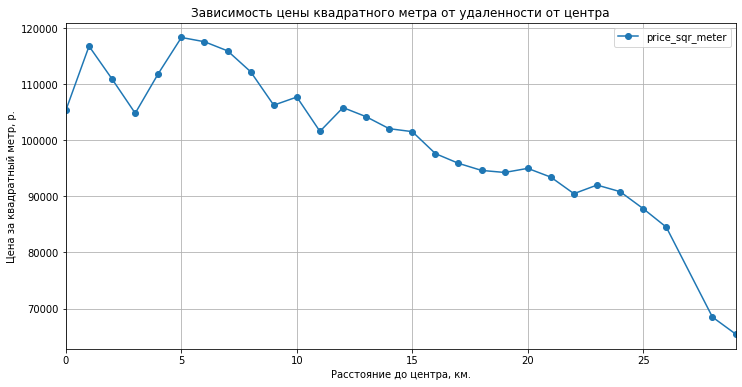

In [62]:
spb = new_df.query('locality_name == "Санкт-Петербург"')
spb['cityCenters_nearest_km']=(spb['cityCenters_nearest']/1000).round(0)
spb_pivot = spb.pivot_table(index = 'cityCenters_nearest_km', values= 'price_sqr_meter')

spb_pivot.plot(title ='Зависимость цены квадратного метра от удаленности от центра', style = 'o-', 
               figsize = (12, 6), grid = True)
plt.xlabel('Расстояние до центра, км.')
plt.ylabel('Цена за квадратный метр, р.')

Судя по графику можно сказать, что цены на квадратный метр начинают снижаться при более 6 км удаленности от центра. То есть квартиры в центре можно считать те, которые находятся в радиусе 6 км от центра города.

### Изучение квартир, находящихся в центре

In [63]:
spb[['last_price','total_area', 'rooms', 'ceiling_height']].corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.771516,0.503511,0.435384
total_area,0.771516,1.000000,0.790299,0.329156
rooms,0.503511,0.790299,1.000000,0.094722
ceiling_height,0.435384,0.329156,0.094722,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7b4bda890>,
      dtype=object)

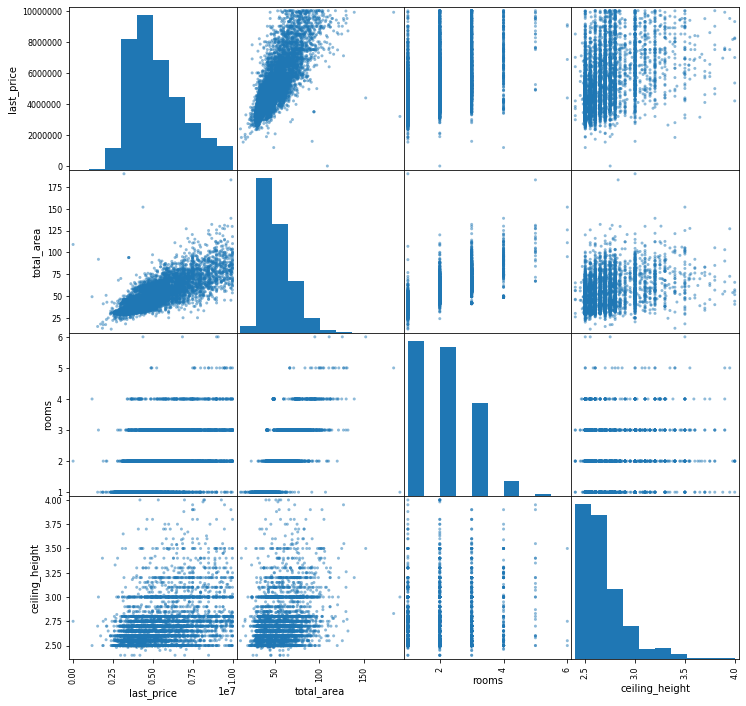

In [64]:
pd.plotting.scatter_matrix(spb[['last_price','total_area', 'rooms', 'ceiling_height']], 
                           figsize =(12, 12))

In [65]:
spb[['last_price', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000', 'total_images',
    'days_exposition']].corr()

,last_price,floor,balcony,parks_around3000,ponds_around3000,total_images,days_exposition
last_price,1.000000,0.065746,0.075846,0.113347,0.152343,0.141751,0.089067
floor,0.065746,1.000000,0.201648,-0.138475,-0.045128,0.043648,-0.020521
balcony,0.075846,0.201648,1.000000,-0.093086,-0.050172,0.050524,-0.018031
parks_around3000,0.113347,-0.138475,-0.093086,1.000000,0.231967,0.004333,0.028647
ponds_around3000,0.152343,-0.045128,-0.050172,0.231967,1.000000,-0.015464,0.015779
total_images,0.141751,0.043648,0.050524,0.004333,-0.015464,1.000000,0.016159
days_exposition,0.089067,-0.020521,-0.018031,0.028647,0.015779,0.016159,1.000000


Что касается центральной части Спб, покупатели больше обращают внимание на площадь квартиры и количество комнат и высоту потолков, остальные параметры не сильно коррелируют с ценой.

In [66]:
new_df[['last_price','total_area', 'rooms', 'ceiling_height']].corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.673591,0.441764,0.413190
total_area,0.673591,1.000000,0.799749,0.301671
rooms,0.441764,0.799749,1.000000,0.073035
ceiling_height,0.413190,0.301671,0.073035,1.000000


In [67]:
new_df[['last_price', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000', 'total_images',
    'days_exposition']].corr()

,last_price,floor,balcony,parks_around3000,ponds_around3000,total_images,days_exposition
last_price,1.000000,0.142620,0.078070,0.098419,0.121855,0.157060,0.021007
floor,0.142620,1.000000,0.191748,-0.147797,-0.064596,0.040772,-0.042292
balcony,0.078070,0.191748,1.000000,-0.101079,-0.051599,0.044167,-0.016731
parks_around3000,0.098419,-0.147797,-0.101079,1.000000,0.299451,0.003281,0.017653
ponds_around3000,0.121855,-0.064596,-0.051599,0.299451,1.000000,-0.019525,0.014702
total_images,0.157060,0.040772,0.044167,0.003281,-0.019525,1.000000,0.014507
days_exposition,0.021007,-0.042292,-0.016731,0.017653,0.014702,0.014507,1.000000


Корреляция цены от площади квартиры и количества комнат немного больше зависит, нежели чем на всей выборке.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7b4672690>,
      dtype=object)

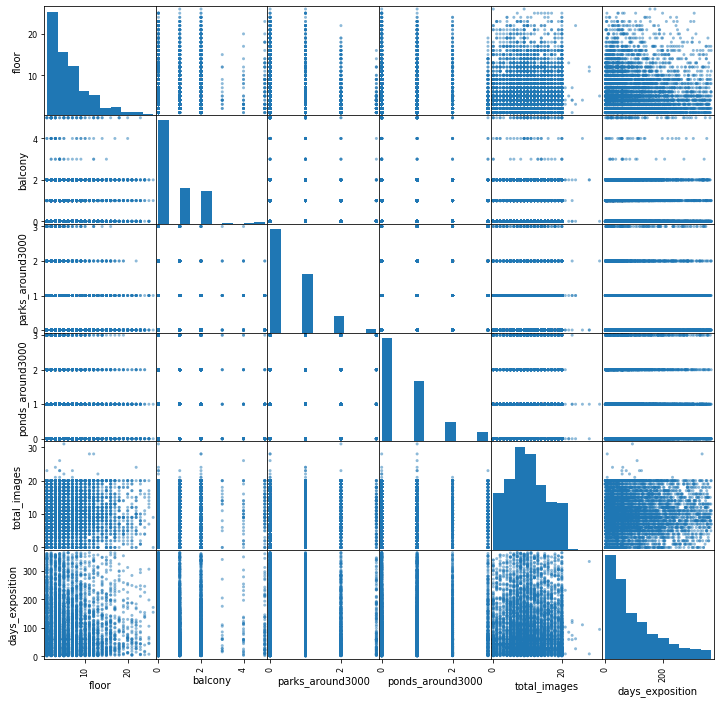

In [68]:
pd.plotting.scatter_matrix(spb[['floor','balcony', 'parks_around3000', 'ponds_around3000', 'total_images', 'days_exposition']], 
                           figsize =(12, 12))

## Общий вывод

Была проведена предобработка данных - были заполнены пропущенные значения, также изменены типы данных, удалены дупликаты, заменили букву 'ё' на букву 'е' в названиях населенных пунктов.

Данные были отфильтрованы, убраны аномальные значения площадей, потолков и количества комнат.

В среднем квартиры продаются за срок около 100 дней.

Самые дешевые квартиры продаются на первом этаже, далее по цене идут квартиры на последнем этаже, и уже далее на промежуточном. 

Стоимость квартиры зависит от удаленности от центра, площади, а также от высоты потолков, от остальных факторов стоимость не имеет сильной зависимости.

Существует зависимость продажи от сезона и даже от дня недели. Квартиры размещенные в будние дни обычно дороже, чем в выходные. В летние месяцы также стоимость квартир ниже, чем в другие.

Самые популярные квартиры в центре Санкт-Петербурга это однушки около 40 кв. м.


Стоит привязать геолокацию к объявлением с автоматическим определением количества парков, прудов и аэропортов.
На основе анализа можно сделать API по рекомендуемой 